## Figure 5A

In [1]:
load("data/Figure5A.rdata")

In [2]:
library(ComplexHeatmap)

# strong defection is defined as with deletion and downregulation or mutations and downregulation
alter_fun = list(
    background = function(x, y, w, h) {
        grid.rect(x, y, w-unit(0.5, "mm"), h-unit(0.5, "mm"), gp = gpar(fill = "#DDDDDD", col = NA))
    },  
    MutDown = function(x, y, w, h) {
        grid.rect(x, y, w-unit(0.5, "mm"), h-unit(0.5, "mm"), gp = gpar(fill = "#ff000a", col = NA))
    },
    
    DelDown= function(x, y, w, h) {
        grid.rect(x, y, w-unit(0.5, "mm"), h-unit(0.5, "mm"), gp = gpar(fill = "#ff000a", col = NA))
    }
    
)

Loading required package: grid

ComplexHeatmap version 2.3.4
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [3]:
col = c("DelDown" = "#ff000a",  "MutDown" = "#ff000a") # No mutDown in the dataset.

In [4]:
col_bar=colSums(antigen=="DelDown;")
row_bar=rowSums(antigen=="DelDown;")

In [5]:
antigen=antigen[row_bar > 0,]
col_bar=colSums(antigen=="DelDown;")
row_bar=rowSums(antigen=="DelDown;")

Warning message:
"package 'circlize' was built under R version 3.6.3"
circlize version 0.4.8
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: http://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization 
  in R. Bioinformatics 2014.


All mutation types: DelDown



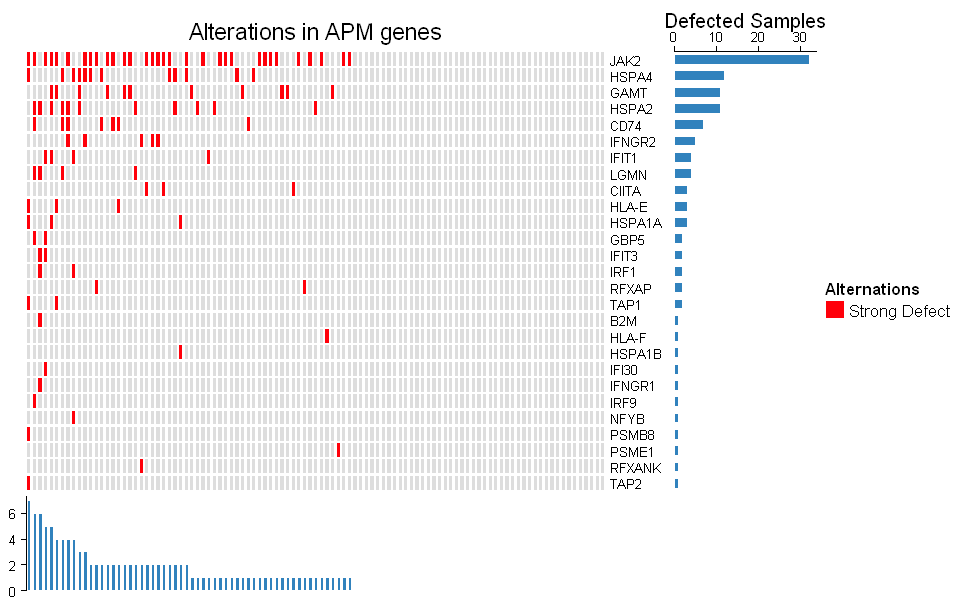

In [6]:
library(circlize)
col_fun = colorRamp2(c(0, 10), c("white", "blue"))


options(repr.plot.width=8,repr.plot.height=5)
oncoPrint(antigen, get_type = function(x) strsplit(x, ";")[[1]],
    alter_fun = alter_fun, col = col,show_pct=FALSE,
    column_title = "Alterations in APM genes",
    row_order=order(row_bar,decreasing = TRUE),
    column_order=order(col_bar,decreasing =TRUE),
           row_names_gp = gpar(fontsize = 8),
    #       pct_side = "right", row_names_side = "left",
    heatmap_legend_param = list(title = "Alternations", at = c("DelDown","MutDown"), 
                                labels = c("Strong Defect", "Mutation+Downregulation")),
    top_annotation = NULL,
    bottom_annotation = HeatmapAnnotation(bar=anno_barplot(col_bar,border=FALSE,height = unit(2, "cm"),
                                                          gp = gpar(col = "white", fill = "#3182bd")),
                                          annotation_label="Count",
                                         show_annotation_name=FALSE), 
    
    
    right_annotation = rowAnnotation(Defect=anno_barplot(row_bar,border=FALSE,width = unit(3, "cm"),
                                                       axis_param = list(side = "top", labels_rot = 0),
                                                         label_param=list(side = "top"),
                                                        gp = gpar(col = "white", fill = "#3182bd")),
                                    annotation_name_side = "top",
                                    annotation_label="Defected Samples"),    
)

## Figure 5D

In [7]:
load("data/Fig5D.rdata")

In [8]:
table(dat$NMF)


Differenciated    Immunogenic       Metablic       Stemness 
            32             27             21             23 

In [9]:
library(reshape2)
library(ggplot2)
library(ggsignif)
library(ggrepel)
data=melt(table(dat$loh,dat$NMF))
colnames(data)=c("HLALOH","NMF","Count")
data$Fraction=data$Count/c(32,32,27,27,21,21,23,23)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'ggrepel' was built under R version 3.6.2"


In [10]:
p1=ggplot(data=data, aes(x = NMF, y = Fraction, fill = HLALOH)) + 
       geom_bar(stat = "identity") + 
       annotate("text",x=1:4,y=0.25,label=data$Count[data$HLALOH=="Yes"],size=5)+
       annotate("text",x=1:4,y=0.85,label=data$Count[data$HLALOH=="No"],size=5)+
       theme_minimal()+
      theme(legend.position = "right",
            axis.text.x=element_text(size=15,angle=-90,hjust=0,vjust=0.5),
            axis.text.y=element_text(size = 15),
            axis.title=element_text(size=18),
            axis.title.x=element_blank()
           )
                                                         


In [11]:
data1=melt(table(dat$loh,dat$danaher_Cluster ))
colnames(data1)=c("HLALOH","Immune","Count")
table(dat$danaher_Cluster)


C1 C2 C3 
35 40 28 

In [12]:
data1$Fraction=data1$Count/c(35,35,40,40,28,28)

In [13]:
data1

HLALOH,Immune,Count,Fraction
<fct>,<fct>,<int>,<dbl>
No,C1,21,0.600
Yes,C1,14,0.400
No,C2,21,0.525
Yes,C2,19,0.475
No,C3,7,0.250
Yes,C3,21,0.750


In [14]:
# C1 and C3 chi-square test
chisq.test(matrix(rbind(c(21,14),c(7,21)),nrow = 2))
# C2 and C3 chi-square test
chisq.test(matrix(rbind(c(21,19),c(7,21)),nrow = 2))


	Pearson's Chi-squared test with Yates' continuity correction

data:  matrix(rbind(c(21, 14), c(7, 21)), nrow = 2)
X-squared = 6.3651, df = 1, p-value = 0.01164



	Pearson's Chi-squared test with Yates' continuity correction

data:  matrix(rbind(c(21, 19), c(7, 21)), nrow = 2)
X-squared = 4.0698, df = 1, p-value = 0.04366


In [15]:
p2=ggplot(data=data1, aes(x = Immune, y = Fraction, fill = HLALOH)) + 
       geom_bar(stat = "identity") + 
       geom_signif(comparisons = list(c("C1", "C3"),c("C2","C3")), 
                   y_position = c(1.05,1.15),
                   annotation=c("*", "*"),
                   tip_length = 0.05, vjust=0.5,textsize=8)+
       scale_y_continuous(breaks=c(0.0,0.25, 0.5, 0.75,1.0))+
       annotate("text",x=1:3,y=0.25,label=data1$Count[data1$HLALOH=="Yes"],size=5)+
       annotate("text",x=1:3,y=0.85,label=data1$Count[data1$HLALOH=="No"],size=5)+ 
       theme_minimal()+
       theme(legend.position = "right",
             axis.text.x=element_text(size = 15,vjust=1,hjust=0.5),
             axis.text.y=element_text(size = 15),
             axis.title=element_text(size=18),
            axis.title.x=element_blank())

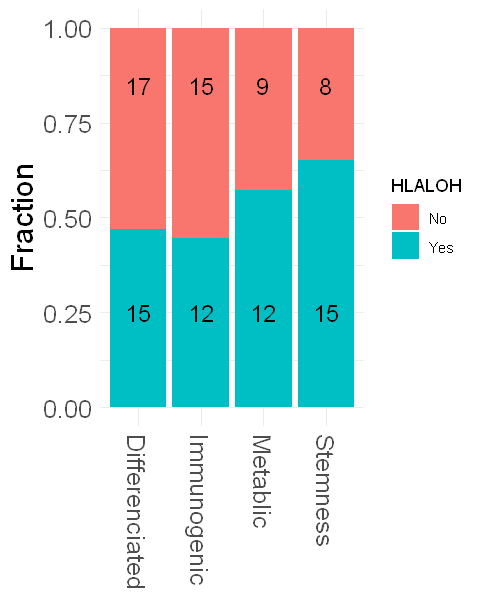

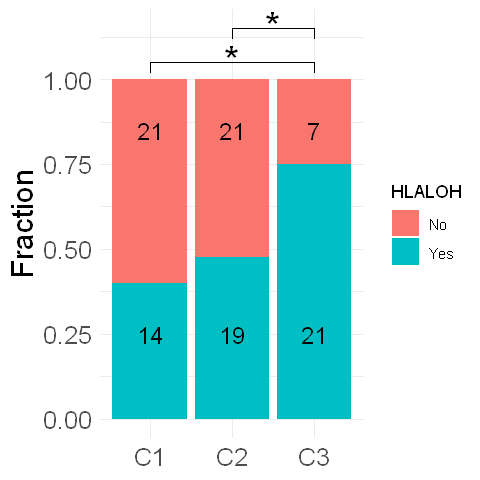

In [16]:
options(repr.plot.width=4,repr.plot.height=5)
p1
options(repr.plot.width=4,repr.plot.height=4)
p2

## Figure 5 E

In [17]:
load("data/Figure5E.rdata")

In [18]:
library(ggsignif)

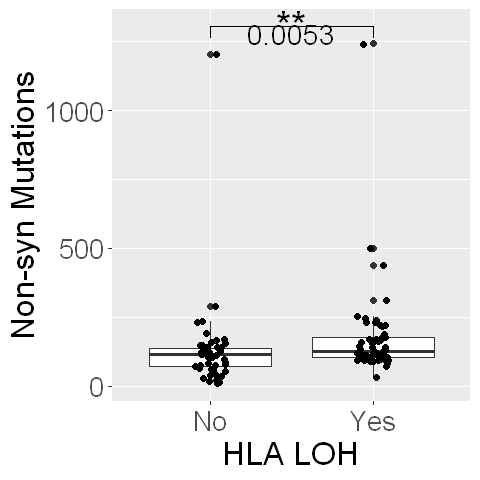

In [19]:
p1 = ggplot(lohdata,aes(x=HLALOH,y=mutations))+geom_boxplot()+geom_jitter(width = 0.1) +
     labs(x="HLA LOH",y="Non-syn Mutations") +
     theme(axis.text= element_text(size=16),axis.title=element_text(size=19)) +
     geom_signif(comparisons=list(c(1,2)),map_signif_level=TRUE,textsize=8,margin_top = 0.05,vjust = 0.5)+
     geom_signif(comparisons=list(c(1,2)),map_signif_level=FALSE,textsize=6,margin_top = 0.05,vjust = 1) # show the wilcox test pvalue
p1


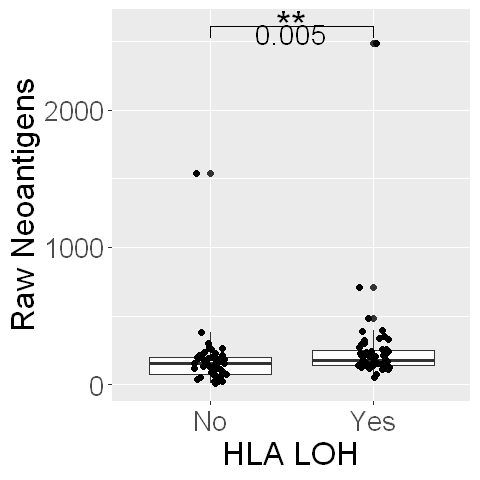

In [20]:
p2 = ggplot(lohdata,aes(x=HLALOH,y=raw))+geom_boxplot()+geom_jitter(width = 0.1) +
     labs(x="HLA LOH",y="Raw Neoantigens") +
     theme(axis.text= element_text(size=16),axis.title=element_text(size=19)) +
     geom_signif(comparisons=list(c(1,2)),map_signif_level=TRUE,textsize=8,margin_top = 0.05,vjust = 0.5)+
     geom_signif(comparisons=list(c(1,2)),map_signif_level=FALSE,textsize=6,margin_top = 0.05,vjust = 1)
p2

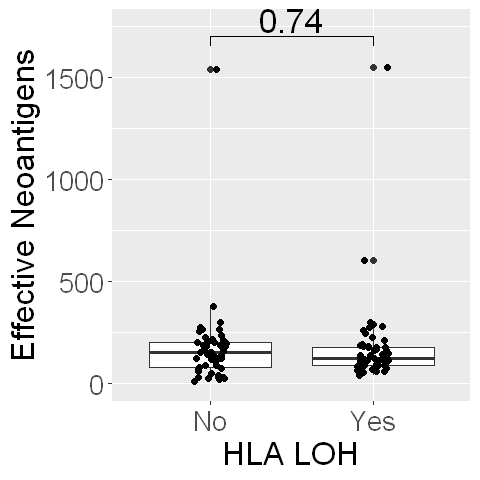

In [21]:
p3 = ggplot(lohdata,aes(x=HLALOH,y=effective))+geom_boxplot()+geom_jitter(width = 0.1) +
     labs(x="HLA LOH",y="Effective Neoantigens") + scale_y_continuous(limits = c(0,1750))+
     theme(axis.text= element_text(size=16),axis.title=element_text(size=19)) +
     geom_signif(comparisons=list(c(1,2)),map_signif_level=FALSE,textsize=7,margin_top = 0.1,vjust = 0)
p3

In [22]:
pdf("Figure5E.pdf",width=4,height=4,onefile=TRUE)
p1
p2
p3
dev.off()

png 
  2